
# Tutorial 4 - Calculating Significance by Monte Carlo

In the homework you should have found the correlation coefficients for some data.  
The Pearson Correlation Coefficient is
\begin{align}
r_{xy} = \frac{1}{N}\frac{ \sum_i (x_i - \bar{x} ) (y_i - \bar{y}) }{ \sqrt{ S^2_x S^2_y} }
\end{align}
where
\begin{align}
\bar{x} = \frac{1}{N}\sum_i x_i ~~~~ S^2_x = \frac{1}{(N-1)} \sum_i ( x_i - \bar{x} )
\end{align}

A non-zero $r_{xy}$ should indicate that there is a correlation between $x$ and $y$.
$r_{xy}$ is an estimator of the populations true correlation coefficient
\begin{align}
\rho_{xy} = \frac{C_{XY}}{\sqrt{\sigma^2_x \sigma_y^2} }
\end{align}

But $r_{xy}$ is a function of random variables so we would not expect it to be exactly 0 
even if there were no correlations.  We could try to calculate the probability distribution of 
$r_{xy}$ analytically, but this might be difficult (more on this in lecture).

##  Monte Carlo

Instead lets find the significance of your measured $r_{xy}$ by Monte Carlo given the hypothesis that 
$x$ and $y$ are not correlated.


1. Create two vectors (X and Y) of random normally distributed numbers with variance 1 and mean zero.  Each vector should be 1000 elements long as was the data in the homework.  Calculate $r_{xy}$ for these.  X and Y 
are uncorrelated since they where generated independently.

2. Repeat step 1 a thousand times to get a distribution of $r_{xy}$.  You should to this in a loop.  There is no reason to save all the X's and Y's.

3. Plot a histogram of your  $r_{xy}$ values.  Does it look Gaussian?

4. What is the fraction of times $|r_{xy}|$ is larger than your measured value for the data in file homework\_01\_2d-datafile.csv ?  Would you expect to get this value if there were no correlation?

5. Do the exercise above over but this time use the measured $S^2_x$, $S^2_y$, $\bar{x}$ and $\bar{y}$ from homework\_01\_2d-datafile.csv  to generate the  X and Y variables.   Plot the new histogram of $r_{xy}$ over the old one.   Is there a difference or is the distribution of $r_{xy}$ independent of the averages and variances of the distributions?

6. Order your sample of $r_{xy}$'s from smallest to largest.  Take the $i$th value to be an estimate of the $r_{xy}$ where $(N-i)/N$ of the probability distribution is larger than it.  For example the 95\% upper bound would be at $i/N = 0.95$.  What is the 95\% upper bound on $r_{xy}$ if there is no correlation between $X$ and $Y$?  We will call this $r_{0.95}$.
In lecture we will find that the variance in this estimator is
\begin{align}
Var[r_p] = \frac{2 p (1-p) }{N f(r_p)^2 }
\end{align}
for large $N$ where $f(r)$ is the pdf of $r_{xy}$. 
Assuming that $r_{xy}$ is Gaussian distributed and its variance is the one you measure, what is the variance in your estimate of $r_{0.95}$?

7. Extra Credit: If you have time, do 1 through 3 for the Spearman and/or Kendall correlation coefficients.  There are Python functions for calculating them efficiently.  These are "rank statistics" that do not rely on any  assumption about the distribution of $X$ and $Y$ (in this case Gaussian) and are thus more widely applicable.  Do they indicate that the data in the home work is correlated?


In [85]:
#Tutorial # 04
## Calculating Significance by Monte Carlo
##

#1) Generate two vectors (X and Y) of random normally distributed numbers 
#   with variance 1 and mean zero.  Each vector should be 1000 elements long 
#   as was the data in the homework.  Calculate $r_{xy}$ for these.
#from __future__ import division
import numpy as np
import scipy.stats as st

def rxy_func(x,y):
    N = len(x)
    xmean = x.mean(); ymean = y.mean()
    xvar = np.var(x); yvar = np.var(y)
    return np.sum((x-xmean)*(y-ymean))/(N * np.sqrt(xvar*yvar))

X, Y = np.random.normal(0.0, scale = 1.0, size = 1000), np.random.normal(0.0, scale = 1.0, size = 1000)
rxy, rxy_p = st.pearsonr(X, Y)


print "The Pearson Correlation Coefficient is:", rxy, rxy_func(X,Y)

The Pearson Correlation Coefficient is: 0.0136633818154 0.0136633818154


In [55]:
#2) Repeat step 1 a thousand times to get a distribution of $r_{xy}$ for a sample 
#   size equal to that of the homework.
n = 1000
X_matrix = np.random.normal(0.0, scale = 1.0, size = (n,n))
Y_matrix = np.random.normal(0.0, scale = 1.0, size = (n,n))

rxy_array = np.array([rxy_func(X_matrix[i], Y_matrix[i]) for i in range(n)])

print "The Pearson Correlation Coefficient array for 500X500 is:", rxy_array


The Pearson Correlation Coefficient array for 500X500 is: [ -1.70979234e-02   4.13162329e-02  -4.04106786e-02   3.29673506e-02
  -7.24730653e-02  -6.08246097e-03   2.75433152e-02  -1.74715959e-02
  -3.13536307e-02  -2.17908347e-02  -2.14330215e-02  -2.69841763e-02
  -4.29836822e-02   1.75040717e-02  -1.20766972e-02   1.36664666e-02
   7.92981114e-03   2.38432218e-03   7.00206505e-02   9.10949426e-03
  -6.06958839e-02   3.78615960e-03   2.60144919e-02   4.77007918e-02
  -5.97391090e-02  -1.13478096e-02  -1.21265697e-02  -5.66068681e-03
  -7.37853228e-03   4.09584481e-02   1.50442144e-02  -1.52956485e-02
   1.23536422e-02   6.62930145e-02   6.96269318e-04  -1.24328624e-02
   2.99238856e-02   2.55949804e-03  -8.28585270e-03  -1.07874177e-02
  -1.33283720e-02   2.66592241e-02  -1.75204058e-04  -5.07566176e-02
   5.10958533e-03   1.24690163e-02  -4.29155694e-02   3.40804326e-02
  -2.03810326e-02   2.67964632e-03   3.32645389e-02   6.91493572e-03
   2.60067275e-02   2.42245584e-02  -3.643134

Bins:  [-0.09620869 -0.08790685 -0.079605   -0.07130315 -0.0630013  -0.05469945
 -0.0463976  -0.03809575 -0.0297939  -0.02149205 -0.01319021 -0.00488836
  0.00341349  0.01171534  0.02001719  0.02831904  0.03662089  0.04492274
  0.05322459  0.06152644  0.06982828  0.07813013  0.08643198  0.09473383
  0.10303568  0.11133753]
[   2.    1.    3.    7.   18.   28.   50.   64.   71.   94.  103.   98.
  112.  103.   81.   59.   36.   25.   22.   10.    5.    6.    0.    1.
    1.]


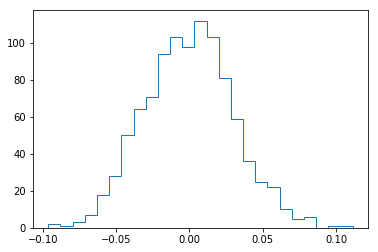

In [78]:
#3) Plot a histogram of your  $r_{xy}$ values.
import matplotlib.pylab as plt

input_array, bins, batches = plt.hist(rxy_array, bins = 25, histtype = 'step')
print 'Bins: ', bins

In [94]:
#4) What is the fraction of times $|r_{xy}|$ is larger than 0.025, 0.05, 0.08?  Would you expect to find this if there 
#   were no correlation?

homework_rxy = 0.025, 0.05, 0.08 

print np.sum(np.abs(rxy_array) < homework_rxy[0])/(1.0 * n)
print np.sum(np.abs(rxy_array) < homework_rxy[1])/(1.0 * n)
print np.sum(np.abs(rxy_array) < homework_rxy[2])/(1.0 * n)

0.593
0.904
0.991


In [ ]:
#5) Do the exersize over but this time use the measured $S^2_x$, $S^2_y$, $\bar{x}$ 
#   and $\bar{y}$ from homework\_01\_2d-datafile.csv  to generate the  X and Y 
#   variables.  Does this make any difference?

In [ ]:
#6) Order your sample of $r_{xy}$'s from smallest to largest.  Take the $i$th 
#   value to be an estimate of the $r_{xy}$ where $(N-i)/N$ of the probability 
#   distribution is larger than it.  For example the 95\% upper bound would be 
#   at i/N = 0.95.  What is the 95% upper bound on $r_{xy}$ if there is not 
#   correlation between $X$ and $Y$?  We will call this $r_{0.95}$.
#   In lecture we will find that the variance in this estimator is
#
#   Var[r_p] = \frac{ 2 p (1-p) }{N f(r_p)^2 }
#
#   for large $N$ where $f(r)$ is the pdf of $r_{xy}$. 
#   Assuming that $r_{xy}$ is Gaussian distributed and its variance is the one 
#   you measure, what is the variance in your estimate of $r_{0.95}$?

In [1]:
#7) Extra Credit: If you have time, do 1 through 3 for the Spearman and/or Kendall correlation coefficients.  
#   There are Python functions for calculating them efficiently.  
#   These are "rank statistics" that do not rely on any  assumption about the distribution of $X$ and $Y$ 
#   (in this case Gaussian) and are thus more widely applicable.  
#   Do they indicate that the data in the home work is correlated?